# Imports and Constants

In [2]:
import pandas as pd
from pathlib import Path
import torch
import transformer_lens
import gc

MODEL_NAME = "EleutherAI/pythia-410m"
# MODEL_NAME = "EleutherAI/pythia-2.8b"

# Collect data

Read in names of basketballers and check their name is 2 tokens exactly.

In [2]:
# data_dir = Path("data")
# names_file = data_dir / "names.txt"
# all_new_names = []

# # Iterate over all csv files in the data directory
# for csv_path in data_dir.glob("*.csv"):
#     # Read the csv file, assuming no header
#     df = pd.read_csv(csv_path, header=None)
#     # Get the second column (index 1) and drop any missing values
#     names_from_csv = df.iloc[:, 1].dropna().tolist()
#     filtered_names = [name for name in names_from_csv if isinstance(name, str) and name.count(' ') == 1]
#     all_new_names.extend(filtered_names)

# # Append the collected names to the names.txt file
# if all_new_names:
#     with open(names_file, "a") as f:
#         # Ensure we start on a new line if the file isn't empty
#         if names_file.stat().st_size > 0:
#             f.write("\n")
#         f.write("\n".join(all_new_names))
#     print(f"Appended {len(all_new_names)} names to {names_file}.")
# else:
#     print("No new names found in CSV files to append.")

In [2]:
names_file = Path("data/names.txt")
with open(names_file, 'r') as f:
    names = f.read().strip().split('\n')
    print(names)

['Yaniv Green', 'Tyrone Hill', 'Francisco Elson', 'Alex English', 'Miroslav Raduljica', 'Andrej Lopatov', 'Jelena Ivezić', 'Avery Johnson', 'Antonio Porta', 'Semyon Antonov', 'Anastasiya Verameyenka', 'Nilay Kartaltepe', 'Laia Palau', 'Samantha Richards', 'Lucius Allen', 'Antonio Davis', 'Hryhorii Khyzhniak', 'Toney Douglas', 'Royce White', 'Pavel Ermolinskij', 'Ergin Ataman', 'Nilton Pacheco', 'Kristaps Janičenoks', 'Roy Hibbert', 'Gary Neal', 'Bismack Biyombo', 'Slađana Golić', 'Eddie Jones', 'Walt Bellamy', 'Pini Gershon', 'Dajuan Wagner', 'Nuria Martínez', 'Manuel Raga', 'Kelly McCarty', 'Tony Gwynn', 'Bogdan Tanjević', 'Dexter Pittman', 'James Johnson', 'Ron Brewer', 'Antoine Diot', 'Billy Hassett', 'Vladimir Micov', 'Jasmin Repeša', 'Panagiotis Giannakis', 'Paulius Jankūnas', 'Larry Kenon', 'Dee Bost', 'Jose Biriukov', 'Gordon Herbert', 'Jim Brewer', 'Irving Meretsky', 'Ralph Klein', 'Darius Morris', 'Adam Wójcik', 'Duane Martin', 'Shad Gaspard', 'Pietro Aradori', 'Cory Higgins',

In [8]:
if "model" in locals() or "model" in globals():
    del model

torch.cuda.empty_cache()

gc.collect()

0

In [4]:
if 'model' in locals() or 'model' in globals():
    del model

torch.cuda.empty_cache()

gc.collect()

# 4. Verify memory is cleared
print(f"GPU memory allocated: {torch.cuda.memory_allocated() / 1024**2:.2f} MB")
print(f"GPU memory reserved: {torch.cuda.memory_reserved() / 1024**2:.2f} MB")

# More detailed GPU memory info
print(torch.cuda.memory_summary())

# Load the Pythia-2.8b model
# This will download the model weights if they are not already cached.
model = transformer_lens.HookedTransformer.from_pretrained_no_processing(
    MODEL_NAME,
    device="cuda" if torch.cuda.is_available() else "cpu",
    dtype=torch.bfloat16 if torch.cuda.is_available() else torch.float32,
)
    
print(f"{MODEL_NAME} model loaded successfully.")

GPU memory allocated: 0.00 MB
GPU memory reserved: 0.00 MB
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |
|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |
|---------------------------------------------------------------------------|
| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |
|    

In [1]:
print(torch.cuda.is_available())
# 4. Verify memory is cleared
print(f"GPU memory allocated: {torch.cuda.memory_allocated() / 1024**2:.2f} MB")
print(f"GPU memory reserved: {torch.cuda.memory_reserved() / 1024**2:.2f} MB")

# More detailed GPU memory info
print(torch.cuda.memory_summary())

NameError: name 'torch' is not defined

In [7]:
# A list to store names that consist of exactly two tokens
two_token_names = []

for name in names:
    # Tokenize the name. The result includes a batch dimension.
    tokens = model.to_tokens(name)

    # Check if the number of tokens (the length of the second dimension) is 3
    # (<soe> token, first name, last name)
    if tokens.shape[1] == 3:
        two_token_names.append(name)
    else:
        print(f"Name '{name}' is represented by {tokens}.")

print(f"Found {len(two_token_names)} names that are exactly two tokens long.")
print(two_token_names)

Name 'Yaniv Green' is represented by tensor([[   0,   58,  266,  400, 6115]], device='cuda:0').
Name 'Tyrone Hill' is represented by tensor([[   0,   53, 6147,  531, 7061]], device='cuda:0').
Name 'Francisco Elson' is represented by tensor([[    0, 39265, 23538,  3599,  1665]], device='cuda:0').
Name 'Miroslav Raduljica' is represented by tensor([[    0, 24711,  2921, 19306,  7754,   335,    75,  3737]],
       device='cuda:0').
Name 'Andrej Lopatov' is represented by tensor([[   0, 1898,  250,   75,  418,  412,  255,  729]], device='cuda:0').
Name 'Jelena Ivezić' is represented by tensor([[   0,   43,  293, 6736,  309,  306, 9877, 9948]], device='cuda:0').
Name 'Avery Johnson' is represented by tensor([[   0,   34,  635, 7902]], device='cuda:0').
Name 'Antonio Porta' is represented by tensor([[    0, 38741,   900,  6162,    66]], device='cuda:0').
Name 'Semyon Antonov' is represented by tensor([[    0, 18581, 22267, 12705,   729]], device='cuda:0').
Name 'Anastasiya Verameyenka' is re

In [35]:
# basketball_players = []
print("Completions for basketball players:")
print("---------------------------------------")

#two_token_names = player_names
basketball_players = []

for name in two_token_names:
    prompt = f"Fact: {name} is known for playing the sport of"

    # Generate a completion for the prompt
    # We generate a few tokens and set temperature to 0 for deterministic output
    completion = model.generate(
        prompt, 
        max_new_tokens=2, 
        temperature=0,
        verbose=True
    )

    # Extract just the generated part of the text
    completion_text = completion[len(prompt):].strip()

    # Check if the completion is 'basketball' (case-insensitive)
    if completion_text.lower().startswith("basketball"):
        basketball_players.append(name)
    else:
        print(completion)
        print(completion_text)
    print(f"Prompt: '{prompt}' -> Completion: '{completion_text}'")


print("\n---------------------------------------")
print(f"Found {len(basketball_players)} names that completed with 'basketball':")
print(basketball_players)

basketball_players_file = Path("data/basketball_players.txt")
with open(basketball_players_file, "w") as f:
    f.write("\n".join(basketball_players))
print(f"Stored {len(basketball_players)} basketball players in {basketball_players_file}.")

Completions for basketball players:
---------------------------------------


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Alex English is known for playing the sport of golf.
golf.
Prompt: 'Fact: Alex English is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Gary Neal is known for playing the sport of golf.
golf.
Prompt: 'Fact: Gary Neal is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: James Johnson is known for playing the sport of golf.
golf.
Prompt: 'Fact: James Johnson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Gordon Herbert is known for playing the sport of golf.
golf.
Prompt: 'Fact: Gordon Herbert is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Robert Parish is known for playing the sport of golf.
golf.
Prompt: 'Fact: Robert Parish is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Charles Smith is known for playing the sport of golf.
golf.
Prompt: 'Fact: Charles Smith is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Rod Strickland is known for playing the sport of golf.
golf.
Prompt: 'Fact: Rod Strickland is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Kevin Edwards is known for playing the sport of golf.
golf.
Prompt: 'Fact: Kevin Edwards is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Scott Brooks is known for playing the sport of golf.
golf.
Prompt: 'Fact: Scott Brooks is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Tony Gonzalez is known for playing the sport of baseball.
baseball.
Prompt: 'Fact: Tony Gonzalez is known for playing the sport of' -> Completion: 'baseball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Chris Warren is known for playing the sport of golf.
golf.
Prompt: 'Fact: Chris Warren is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: George Wilson is known for playing the sport of golf.
golf.
Prompt: 'Fact: George Wilson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Grant Hill is known for playing the sport of golf.
golf.
Prompt: 'Fact: Grant Hill is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Michael Brooks is known for playing the sport of golf.
golf.
Prompt: 'Fact: Michael Brooks is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Richard Hamilton is known for playing the sport of golf.
golf.
Prompt: 'Fact: Richard Hamilton is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Bob Gibson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Bob Gibson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jason Terry is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jason Terry is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Bill Russell is known for playing the sport of' -> Completion: 'basketball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Kevin Love is known for playing the sport of' -> Completion: 'basketball,'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ben Wallace is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ben Wallace is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Kevin Nash is known for playing the sport of golf.
golf.
Prompt: 'Fact: Kevin Nash is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Kevin Willis is known for playing the sport of golf.
golf.
Prompt: 'Fact: Kevin Willis is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Mel Daniels is known for playing the sport of golf.
golf.
Prompt: 'Fact: Mel Daniels is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: David Robinson is known for playing the sport of golf.
golf.
Prompt: 'Fact: David Robinson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Ray Allen is known for playing the sport of' -> Completion: 'basketball,'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Bob Hill is known for playing the sport of golf.
golf.
Prompt: 'Fact: Bob Hill is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Tan White is known for playing the sport of golf.
golf.
Prompt: 'Fact: Tan White is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Chris Paul is known for playing the sport of' -> Completion: 'basketball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Paul Davis is known for playing the sport of golf.
golf.
Prompt: 'Fact: Paul Davis is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Josh Powell is known for playing the sport of golf.
golf.
Prompt: 'Fact: Josh Powell is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Kevin Johnson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Kevin Johnson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Mike Barrett is known for playing the sport of golf.
golf.
Prompt: 'Fact: Mike Barrett is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Anne Donovan is known for playing the sport of tennis.
tennis.
Prompt: 'Fact: Anne Donovan is known for playing the sport of' -> Completion: 'tennis.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Michael Jordan is known for playing the sport of' -> Completion: 'basketball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Kevin Porter is known for playing the sport of golf.
golf.
Prompt: 'Fact: Kevin Porter is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Magic Johnson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Magic Johnson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Joe Johnson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Joe Johnson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Tony Parker is known for playing the sport of' -> Completion: 'basketball,'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Carl Lewis is known for playing the sport of golf.
golf.
Prompt: 'Fact: Carl Lewis is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: James Augustine is known for playing the sport of golf.
golf.
Prompt: 'Fact: James Augustine is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Tim Duncan is known for playing the sport of' -> Completion: 'basketball,'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Steve Nash is known for playing the sport of golf.
golf.
Prompt: 'Fact: Steve Nash is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Mark Price is known for playing the sport of golf.
golf.
Prompt: 'Fact: Mark Price is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Matt Morgan is known for playing the sport of golf.
golf.
Prompt: 'Fact: Matt Morgan is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Paul Pierce is known for playing the sport of' -> Completion: 'basketball,'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jeff Turner is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jeff Turner is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jason Richardson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jason Richardson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Charlie Ward is known for playing the sport of golf.
golf.
Prompt: 'Fact: Charlie Ward is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jim Jackson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jim Jackson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Doug Christie is known for playing the sport of golf.
golf.
Prompt: 'Fact: Doug Christie is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Buck Williams is known for playing the sport of golf.
golf.
Prompt: 'Fact: Buck Williams is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Daniel Santiago is known for playing the sport of golf.
golf.
Prompt: 'Fact: Daniel Santiago is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Phil Jackson is known for playing the sport of' -> Completion: 'basketball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Frank Brian is known for playing the sport of golf.
golf.
Prompt: 'Fact: Frank Brian is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Greg Monroe is known for playing the sport of golf.
golf.
Prompt: 'Fact: Greg Monroe is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Matt Walsh is known for playing the sport of golf.
golf.
Prompt: 'Fact: Matt Walsh is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Anthony Davis is known for playing the sport of' -> Completion: 'basketball,'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Bob Love is known for playing the sport of golf.
golf.
Prompt: 'Fact: Bob Love is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Big Cass is known for playing the sport of golf.
golf.
Prompt: 'Fact: Big Cass is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Thomas Robinson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Thomas Robinson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ben Gordon is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ben Gordon is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Josh Smith is known for playing the sport of golf.
golf.
Prompt: 'Fact: Josh Smith is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jay Williams is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jay Williams is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Mike Scott is known for playing the sport of golf.
golf.
Prompt: 'Fact: Mike Scott is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: John Bryant is known for playing the sport of golf.
golf.
Prompt: 'Fact: John Bryant is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jordan Hamilton is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jordan Hamilton is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Bob Davies is known for playing the sport of golf.
golf.
Prompt: 'Fact: Bob Davies is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Austin Rivers is known for playing the sport of golf.
golf.
Prompt: 'Fact: Austin Rivers is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Bob Knight is known for playing the sport of golf.
golf.
Prompt: 'Fact: Bob Knight is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Josh Carter is known for playing the sport of golf.
golf.
Prompt: 'Fact: Josh Carter is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Pat Riley is known for playing the sport of' -> Completion: 'basketball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Brian Cardinal is known for playing the sport of golf.
golf.
Prompt: 'Fact: Brian Cardinal is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Brian Roberts is known for playing the sport of golf.
golf.
Prompt: 'Fact: Brian Roberts is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: John Wall is known for playing the sport of' -> Completion: 'basketball,'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Gary Alexander is known for playing the sport of golf.
golf.
Prompt: 'Fact: Gary Alexander is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Doug Collins is known for playing the sport of golf.
golf.
Prompt: 'Fact: Doug Collins is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jason Smith is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jason Smith is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Charlie Scott is known for playing the sport of golf.
golf.
Prompt: 'Fact: Charlie Scott is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ron Harper is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ron Harper is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jason Williams is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jason Williams is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Brian Grant is known for playing the sport of golf.
golf.
Prompt: 'Fact: Brian Grant is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Victor Alexander is known for playing the sport of golf.
golf.
Prompt: 'Fact: Victor Alexander is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Adam Morrison is known for playing the sport of rugby,
rugby,
Prompt: 'Fact: Adam Morrison is known for playing the sport of' -> Completion: 'rugby,'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: James White is known for playing the sport of golf.
golf.
Prompt: 'Fact: James White is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Doc Rivers is known for playing the sport of golf,
golf,
Prompt: 'Fact: Doc Rivers is known for playing the sport of' -> Completion: 'golf,'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Rod Thorn is known for playing the sport of golf.
golf.
Prompt: 'Fact: Rod Thorn is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Neil Johnston is known for playing the sport of golf.
golf.
Prompt: 'Fact: Neil Johnston is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Mo Williams is known for playing the sport of golf.
golf.
Prompt: 'Fact: Mo Williams is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Frank Ramsey is known for playing the sport of golf.
golf.
Prompt: 'Fact: Frank Ramsey is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Charlie Bell is known for playing the sport of golf.
golf.
Prompt: 'Fact: Charlie Bell is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Stephen Curry is known for playing the sport of' -> Completion: 'basketball,'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Lou Williams is known for playing the sport of golf.
golf.
Prompt: 'Fact: Lou Williams is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Steve Francis is known for playing the sport of golf.
golf.
Prompt: 'Fact: Steve Francis is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Tex Winter is known for playing the sport of golf.
golf.
Prompt: 'Fact: Tex Winter is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Don Nelson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Don Nelson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Sam Perkins is known for playing the sport of golf.
golf.
Prompt: 'Fact: Sam Perkins is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jim Brown is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jim Brown is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ed Davis is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ed Davis is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ryan Anderson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ryan Anderson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Richard Jefferson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Richard Jefferson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Jordan Crawford is known for playing the sport of' -> Completion: 'basketball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jeff Green is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jeff Green is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Mike Miller is known for playing the sport of golf.
golf.
Prompt: 'Fact: Mike Miller is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Tom Henderson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Tom Henderson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Eric Gordon is known for playing the sport of golf.
golf.
Prompt: 'Fact: Eric Gordon is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Rick Fox is known for playing the sport of golf.
golf.
Prompt: 'Fact: Rick Fox is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Anthony Parker is known for playing the sport of golf.
golf.
Prompt: 'Fact: Anthony Parker is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Eric Snow is known for playing the sport of golf.
golf.
Prompt: 'Fact: Eric Snow is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: George Karl is known for playing the sport of golf.
golf.
Prompt: 'Fact: George Karl is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Bill Walton is known for playing the sport of' -> Completion: 'basketball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Josh Howard is known for playing the sport of golf.
golf.
Prompt: 'Fact: Josh Howard is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ken Howard is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ken Howard is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Joe Bryant is known for playing the sport of golf.
golf.
Prompt: 'Fact: Joe Bryant is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ray Felix is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ray Felix is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Fred Jones is known for playing the sport of golf.
golf.
Prompt: 'Fact: Fred Jones is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Sam Mitchell is known for playing the sport of golf.
golf.
Prompt: 'Fact: Sam Mitchell is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Mark Jackson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Mark Jackson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jason Thompson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jason Thompson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Will Barton is known for playing the sport of golf.
golf.
Prompt: 'Fact: Will Barton is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Brad Miller is known for playing the sport of golf.
golf.
Prompt: 'Fact: Brad Miller is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Sam Jones is known for playing the sport of golf.
golf.
Prompt: 'Fact: Sam Jones is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Austin Carr is known for playing the sport of golf.
golf.
Prompt: 'Fact: Austin Carr is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Greg Foster is known for playing the sport of golf.
golf.
Prompt: 'Fact: Greg Foster is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Al Jefferson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Al Jefferson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Tony Allen is known for playing the sport of golf.
golf.
Prompt: 'Fact: Tony Allen is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Daniel Gibson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Daniel Gibson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Kelly Santos is known for playing the sport of golf.
golf.
Prompt: 'Fact: Kelly Santos is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Donnell Harvey is known for playing the sport of golf.
golf.
Prompt: 'Fact: Donnell Harvey is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Robert Pack is known for playing the sport of golf.
golf.
Prompt: 'Fact: Robert Pack is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Anna Cruz is known for playing the sport of tennis.
tennis.
Prompt: 'Fact: Anna Cruz is known for playing the sport of' -> Completion: 'tennis.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Tre Simmons is known for playing the sport of golf.
golf.
Prompt: 'Fact: Tre Simmons is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Luke Walton is known for playing the sport of golf.
golf.
Prompt: 'Fact: Luke Walton is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Steve Mix is known for playing the sport of golf.
golf.
Prompt: 'Fact: Steve Mix is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Daniel Clark is known for playing the sport of golf.
golf.
Prompt: 'Fact: Daniel Clark is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Rick Barry is known for playing the sport of golf.
golf.
Prompt: 'Fact: Rick Barry is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Mike Brown is known for playing the sport of' -> Completion: 'basketball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Kevin Martin is known for playing the sport of golf.
golf.
Prompt: 'Fact: Kevin Martin is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Alan Anderson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Alan Anderson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Allen Kelley is known for playing the sport of golf.
golf.
Prompt: 'Fact: Allen Kelley is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Dave Bing is known for playing the sport of golf.
golf.
Prompt: 'Fact: Dave Bing is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: James Jones is known for playing the sport of golf.
golf.
Prompt: 'Fact: James Jones is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Vern Fleming is known for playing the sport of golf.
golf.
Prompt: 'Fact: Vern Fleming is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Tom Chambers is known for playing the sport of golf.
golf.
Prompt: 'Fact: Tom Chambers is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Patrick Patterson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Patrick Patterson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jack George is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jack George is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jim Les is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jim Les is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ron Lee is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ron Lee is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Nick Young is known for playing the sport of golf.
golf.
Prompt: 'Fact: Nick Young is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: James Anderson is known for playing the sport of golf.
golf.
Prompt: 'Fact: James Anderson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Mark West is known for playing the sport of golf.
golf.
Prompt: 'Fact: Mark West is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jim Price is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jim Price is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Fred Boyd is known for playing the sport of golf.
golf.
Prompt: 'Fact: Fred Boyd is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Chen Nan is known for playing the sport of kung
kung
Prompt: 'Fact: Chen Nan is known for playing the sport of' -> Completion: 'kung'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Li Nan is known for playing the sport of kung
kung
Prompt: 'Fact: Li Nan is known for playing the sport of' -> Completion: 'kung'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: William Evans is known for playing the sport of golf.
golf.
Prompt: 'Fact: William Evans is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Carl Cain is known for playing the sport of golf.
golf.
Prompt: 'Fact: Carl Cain is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Blue Edwards is known for playing the sport of golf.
golf.
Prompt: 'Fact: Blue Edwards is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Don Dee is known for playing the sport of golf.
golf.
Prompt: 'Fact: Don Dee is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: John Brown is known for playing the sport of poker.
poker.
Prompt: 'Fact: John Brown is known for playing the sport of' -> Completion: 'poker.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Kevin Jones is known for playing the sport of golf.
golf.
Prompt: 'Fact: Kevin Jones is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: John Thompson is known for playing the sport of golf.
golf.
Prompt: 'Fact: John Thompson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jim Barnes is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jim Barnes is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Liu Wei is known for playing the sport of kung
kung
Prompt: 'Fact: Liu Wei is known for playing the sport of' -> Completion: 'kung'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: James King is known for playing the sport of golf.
golf.
Prompt: 'Fact: James King is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ken Spain is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ken Spain is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Bob Rule is known for playing the sport of golf.
golf.
Prompt: 'Fact: Bob Rule is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Wilson Chandler is known for playing the sport of golf.
golf.
Prompt: 'Fact: Wilson Chandler is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Matthew Nielsen is known for playing the sport of golf.
golf.
Prompt: 'Fact: Matthew Nielsen is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jim Walsh is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jim Walsh is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Steve Johnson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Steve Johnson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: David Thompson is known for playing the sport of golf.
golf.
Prompt: 'Fact: David Thompson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: David West is known for playing the sport of golf.
golf.
Prompt: 'Fact: David West is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Charles Jenkins is known for playing the sport of golf.
golf.
Prompt: 'Fact: Charles Jenkins is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Master P is known for playing the sport of golf,
golf,
Prompt: 'Fact: Master P is known for playing the sport of' -> Completion: 'golf,'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Guy Rodgers is known for playing the sport of golf.
golf.
Prompt: 'Fact: Guy Rodgers is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Bob Gross is known for playing the sport of golf.
golf.
Prompt: 'Fact: Bob Gross is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Lou Hudson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Lou Hudson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Luke Jackson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Luke Jackson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Leon Robinson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Leon Robinson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Roger Brown is known for playing the sport of golf.
golf.
Prompt: 'Fact: Roger Brown is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Alex Garcia is known for playing the sport of golf.
golf.
Prompt: 'Fact: Alex Garcia is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: John Block is known for playing the sport of golf.
golf.
Prompt: 'Fact: John Block is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Steven Hunter is known for playing the sport of golf.
golf.
Prompt: 'Fact: Steven Hunter is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Carl Braun is known for playing the sport of golf.
golf.
Prompt: 'Fact: Carl Braun is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Leon Wood is known for playing the sport of golf.
golf.
Prompt: 'Fact: Leon Wood is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Edward Dawson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Edward Dawson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jeff Foster is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jeff Foster is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Carl English is known for playing the sport of golf.
golf.
Prompt: 'Fact: Carl English is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: William Bedford is known for playing the sport of golf.
golf.
Prompt: 'Fact: William Bedford is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jay Vincent is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jay Vincent is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: James Forbes is known for playing the sport of golf.
golf.
Prompt: 'Fact: James Forbes is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Nick Anderson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Nick Anderson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Joe Alexander is known for playing the sport of golf.
golf.
Prompt: 'Fact: Joe Alexander is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Lew Beck is known for playing the sport of golf.
golf.
Prompt: 'Fact: Lew Beck is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Gordon Carpenter is known for playing the sport of golf.
golf.
Prompt: 'Fact: Gordon Carpenter is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: John Keller is known for playing the sport of golf.
golf.
Prompt: 'Fact: John Keller is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: John Long is known for playing the sport of golf.
golf.
Prompt: 'Fact: John Long is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Matt Carroll is known for playing the sport of golf.
golf.
Prompt: 'Fact: Matt Carroll is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Charles Smith is known for playing the sport of golf.
golf.
Prompt: 'Fact: Charles Smith is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Sam Vincent is known for playing the sport of golf.
golf.
Prompt: 'Fact: Sam Vincent is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Brian Shaw is known for playing the sport of golf.
golf.
Prompt: 'Fact: Brian Shaw is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Brian Taylor is known for playing the sport of golf.
golf.
Prompt: 'Fact: Brian Taylor is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Anthony Johnson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Anthony Johnson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Robert Pitts is known for playing the sport of golf.
golf.
Prompt: 'Fact: Robert Pitts is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Fred House is known for playing the sport of golf.
golf.
Prompt: 'Fact: Fred House is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Dick Davies is known for playing the sport of golf.
golf.
Prompt: 'Fact: Dick Davies is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Phil Heath is known for playing the sport of golf.
golf.
Prompt: 'Fact: Phil Heath is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Bill Walker is known for playing the sport of golf.
golf.
Prompt: 'Fact: Bill Walker is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: James Edwards is known for playing the sport of golf.
golf.
Prompt: 'Fact: James Edwards is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Steve Blake is known for playing the sport of golf.
golf.
Prompt: 'Fact: Steve Blake is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: George Dixon is known for playing the sport of golf.
golf.
Prompt: 'Fact: George Dixon is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Phil Smith is known for playing the sport of golf.
golf.
Prompt: 'Fact: Phil Smith is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jordan Hill is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jordan Hill is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Phil Ford is known for playing the sport of golf.
golf.
Prompt: 'Fact: Phil Ford is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Mike James is known for playing the sport of golf.
golf.
Prompt: 'Fact: Mike James is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jo Hill is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jo Hill is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Matt Barnes is known for playing the sport of golf.
golf.
Prompt: 'Fact: Matt Barnes is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Michael Cooper is known for playing the sport of golf.
golf.
Prompt: 'Fact: Michael Cooper is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Paul George is known for playing the sport of' -> Completion: 'basketball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Al Thornton is known for playing the sport of golf.
golf.
Prompt: 'Fact: Al Thornton is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Marc Jackson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Marc Jackson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: John Holland is known for playing the sport of golf.
golf.
Prompt: 'Fact: John Holland is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Stephen Jackson is known for playing the sport of football.
football.
Prompt: 'Fact: Stephen Jackson is known for playing the sport of' -> Completion: 'football.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Steve Smith is known for playing the sport of rugby union
rugby union
Prompt: 'Fact: Steve Smith is known for playing the sport of' -> Completion: 'rugby union'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: David Lee is known for playing the sport of golf.
golf.
Prompt: 'Fact: David Lee is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Chris Wilcox is known for playing the sport of golf.
golf.
Prompt: 'Fact: Chris Wilcox is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Steven Gray is known for playing the sport of golf.
golf.
Prompt: 'Fact: Steven Gray is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Chris Johnson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Chris Johnson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Art Chapman is known for playing the sport of golf.
golf.
Prompt: 'Fact: Art Chapman is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Will Solomon is known for playing the sport of golf.
golf.
Prompt: 'Fact: Will Solomon is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Brian Cook is known for playing the sport of golf.
golf.
Prompt: 'Fact: Brian Cook is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Anthony Carter is known for playing the sport of golf.
golf.
Prompt: 'Fact: Anthony Carter is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Anthony Mason is known for playing the sport of golf.
golf.
Prompt: 'Fact: Anthony Mason is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Tim Thomas is known for playing the sport of golf.
golf.
Prompt: 'Fact: Tim Thomas is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ye Li is known for playing the sport of kung
kung
Prompt: 'Fact: Ye Li is known for playing the sport of' -> Completion: 'kung'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: John Jenkins is known for playing the sport of golf.
golf.
Prompt: 'Fact: John Jenkins is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Bill Bradley is known for playing the sport of' -> Completion: 'basketball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ray Williams is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ray Williams is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Charles Lee is known for playing the sport of golf.
golf.
Prompt: 'Fact: Charles Lee is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: David Logan is known for playing the sport of golf.
golf.
Prompt: 'Fact: David Logan is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Joe Smith is known for playing the sport of golf.
golf.
Prompt: 'Fact: Joe Smith is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Bob Morse is known for playing the sport of golf.
golf.
Prompt: 'Fact: Bob Morse is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Chris Quinn is known for playing the sport of golf.
golf.
Prompt: 'Fact: Chris Quinn is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ryan Richards is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ryan Richards is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Chris Ford is known for playing the sport of golf.
golf.
Prompt: 'Fact: Chris Ford is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Fred Brown is known for playing the sport of golf.
golf.
Prompt: 'Fact: Fred Brown is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Stephen Graham is known for playing the sport of golf.
golf.
Prompt: 'Fact: Stephen Graham is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Greg Anthony is known for playing the sport of golf.
golf.
Prompt: 'Fact: Greg Anthony is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: David Wesley is known for playing the sport of golf.
golf.
Prompt: 'Fact: David Wesley is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ryan Stack is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ryan Stack is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: David Blu is known for playing the sport of golf.
golf.
Prompt: 'Fact: David Blu is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Anthony Randolph is known for playing the sport of golf.
golf.
Prompt: 'Fact: Anthony Randolph is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: George Hill is known for playing the sport of golf.
golf.
Prompt: 'Fact: George Hill is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ty Lawson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ty Lawson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Greg Smith is known for playing the sport of golf.
golf.
Prompt: 'Fact: Greg Smith is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ken Sears is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ken Sears is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Steve Kerr is known for playing the sport of' -> Completion: 'basketball,'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Robert Swift is known for playing the sport of golf.
golf.
Prompt: 'Fact: Robert Swift is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jack Marin is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jack Marin is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: John Drew is known for playing the sport of golf.
golf.
Prompt: 'Fact: John Drew is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Charles Smith is known for playing the sport of golf.
golf.
Prompt: 'Fact: Charles Smith is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Bob Harrison is known for playing the sport of golf.
golf.
Prompt: 'Fact: Bob Harrison is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jack Coleman is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jack Coleman is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Kevin Joyce is known for playing the sport of golf.
golf.
Prompt: 'Fact: Kevin Joyce is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Bob Hansen is known for playing the sport of golf.
golf.
Prompt: 'Fact: Bob Hansen is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Phil Hubbard is known for playing the sport of golf.
golf.
Prompt: 'Fact: Phil Hubbard is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Scott May is known for playing the sport of golf.
golf.
Prompt: 'Fact: Scott May is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Bob Bass is known for playing the sport of golf.
golf.
Prompt: 'Fact: Bob Bass is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Mel Counts is known for playing the sport of golf.
golf.
Prompt: 'Fact: Mel Counts is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: James Stewart is known for playing the sport of poker.
poker.
Prompt: 'Fact: James Stewart is known for playing the sport of' -> Completion: 'poker.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Sarah Michel is known for playing the sport of tennis.
tennis.
Prompt: 'Fact: Sarah Michel is known for playing the sport of' -> Completion: 'tennis.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: John Johnson is known for playing the sport of golf.
golf.
Prompt: 'Fact: John Johnson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Michael Warren is known for playing the sport of golf.
golf.
Prompt: 'Fact: Michael Warren is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Michael Green is known for playing the sport of golf.
golf.
Prompt: 'Fact: Michael Green is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Michael Adams is known for playing the sport of golf.
golf.
Prompt: 'Fact: Michael Adams is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jon Barry is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jon Barry is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: John Wallace is known for playing the sport of golf.
golf.
Prompt: 'Fact: John Wallace is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Michael Hawkins is known for playing the sport of golf.
golf.
Prompt: 'Fact: Michael Hawkins is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Bob Weiss is known for playing the sport of golf.
golf.
Prompt: 'Fact: Bob Weiss is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: John Williamson is known for playing the sport of golf.
golf.
Prompt: 'Fact: John Williamson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Norm Nixon is known for playing the sport of golf.
golf.
Prompt: 'Fact: Norm Nixon is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Brad Davis is known for playing the sport of golf.
golf.
Prompt: 'Fact: Brad Davis is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Greg Hardy is known for playing the sport of golf.
golf.
Prompt: 'Fact: Greg Hardy is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Henry Hyde is known for playing the sport of golf.
golf.
Prompt: 'Fact: Henry Hyde is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Chris Johnson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Chris Johnson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Mike Mitchell is known for playing the sport of golf.
golf.
Prompt: 'Fact: Mike Mitchell is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Gene Banks is known for playing the sport of genealogy
genealogy
Prompt: 'Fact: Gene Banks is known for playing the sport of' -> Completion: 'genealogy'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Grant Long is known for playing the sport of golf.
golf.
Prompt: 'Fact: Grant Long is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Jason Collins is known for playing the sport of' -> Completion: 'basketball,'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Alan Henderson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Alan Henderson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Chris Morris is known for playing the sport of golf.
golf.
Prompt: 'Fact: Chris Morris is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Nick Nurse is known for playing the sport of golf.
golf.
Prompt: 'Fact: Nick Nurse is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Les Hunter is known for playing the sport of golf.
golf.
Prompt: 'Fact: Les Hunter is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Brad Stevens is known for playing the sport of golf.
golf.
Prompt: 'Fact: Brad Stevens is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Anthony Bennett is known for playing the sport of golf.
golf.
Prompt: 'Fact: Anthony Bennett is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Alex Len is known for playing the sport of golf.
golf.
Prompt: 'Fact: Alex Len is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Gary Harris is known for playing the sport of golf.
golf.
Prompt: 'Fact: Gary Harris is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Tony Bennett is known for playing the sport of golf.
golf.
Prompt: 'Fact: Tony Bennett is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Michael Roll is known for playing the sport of golf.
golf.
Prompt: 'Fact: Michael Roll is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Mike James is known for playing the sport of golf.
golf.
Prompt: 'Fact: Mike James is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Michael Hicks is known for playing the sport of golf.
golf.
Prompt: 'Fact: Michael Hicks is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Pierre Jackson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Pierre Jackson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Will Thomas is known for playing the sport of golf.
golf.
Prompt: 'Fact: Will Thomas is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: James Young is known for playing the sport of golf.
golf.
Prompt: 'Fact: James Young is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Josh Duncan is known for playing the sport of' -> Completion: 'basketball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Steven Adams is known for playing the sport of golf.
golf.
Prompt: 'Fact: Steven Adams is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Andrew Harrison is known for playing the sport of golf.
golf.
Prompt: 'Fact: Andrew Harrison is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: John Brown is known for playing the sport of poker.
poker.
Prompt: 'Fact: John Brown is known for playing the sport of' -> Completion: 'poker.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Steve Clifford is known for playing the sport of golf.
golf.
Prompt: 'Fact: Steve Clifford is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ryan Kelly is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ryan Kelly is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Joe Harris is known for playing the sport of golf.
golf.
Prompt: 'Fact: Joe Harris is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Nick Johnson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Nick Johnson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Patrick Miller is known for playing the sport of golf.
golf.
Prompt: 'Fact: Patrick Miller is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Patrick Richard is known for playing the sport of golf.
golf.
Prompt: 'Fact: Patrick Richard is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Jordan Adams is known for playing the sport of' -> Completion: 'basketball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Jordan Mickey is known for playing the sport of' -> Completion: 'basketball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Joe Young is known for playing the sport of golf.
golf.
Prompt: 'Fact: Joe Young is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Alan Williams is known for playing the sport of golf.
golf.
Prompt: 'Fact: Alan Williams is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Eric Griffin is known for playing the sport of golf.
golf.
Prompt: 'Fact: Eric Griffin is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Josh Jackson is known for playing the sport of' -> Completion: 'basketball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Russ Smith is known for playing the sport of golf.
golf.
Prompt: 'Fact: Russ Smith is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Ben Simmons is known for playing the sport of' -> Completion: 'basketball,'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ron Baker is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ron Baker is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Chris Silva is known for playing the sport of golf.
golf.
Prompt: 'Fact: Chris Silva is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Christian Wood is known for playing the sport of golf.
golf.
Prompt: 'Fact: Christian Wood is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Thomas Welsh is known for playing the sport of golf.
golf.
Prompt: 'Fact: Thomas Welsh is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: William Howard is known for playing the sport of golf.
golf.
Prompt: 'Fact: William Howard is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Matt Thomas is known for playing the sport of golf.
golf.
Prompt: 'Fact: Matt Thomas is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Anthony Brown is known for playing the sport of' -> Completion: 'basketball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jordan Theodore is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jordan Theodore is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Josh Richardson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Josh Richardson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Thomas Bryant is known for playing the sport of golf.
golf.
Prompt: 'Fact: Thomas Bryant is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Dave East is known for playing the sport of golf.
golf.
Prompt: 'Fact: Dave East is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Anthony Gill is known for playing the sport of golf.
golf.
Prompt: 'Fact: Anthony Gill is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Josh Hart is known for playing the sport of golf.
golf.
Prompt: 'Fact: Josh Hart is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Frank Jackson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Frank Jackson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Nick Kay is known for playing the sport of golf.
golf.
Prompt: 'Fact: Nick Kay is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jordan Bell is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jordan Bell is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: John Collins is known for playing the sport of golf.
golf.
Prompt: 'Fact: John Collins is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jonathan Isaac is known for playing the sport of baseball.
baseball.
Prompt: 'Fact: Jonathan Isaac is known for playing the sport of' -> Completion: 'baseball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Tony Bradley is known for playing the sport of golf.
golf.
Prompt: 'Fact: Tony Bradley is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Nick Richards is known for playing the sport of golf.
golf.
Prompt: 'Fact: Nick Richards is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Grant Williams is known for playing the sport of golf.
golf.
Prompt: 'Fact: Grant Williams is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jordan Caroline is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jordan Caroline is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Josh Green is known for playing the sport of golf.
golf.
Prompt: 'Fact: Josh Green is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Cole Anthony is known for playing the sport of golf.
golf.
Prompt: 'Fact: Cole Anthony is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Tre Jones is known for playing the sport of golf.
golf.
Prompt: 'Fact: Tre Jones is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Paul Watson is known for playing the sport of golf.
golf.
Prompt: 'Fact: Paul Watson is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Han Xu is known for playing the sport of golf.
golf.
Prompt: 'Fact: Han Xu is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Prompt: 'Fact: Jordan Bone is known for playing the sport of' -> Completion: 'basketball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Tre Mann is known for playing the sport of golf.
golf.
Prompt: 'Fact: Tre Mann is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Anthony Edwards is known for playing the sport of golf.
golf.
Prompt: 'Fact: Anthony Edwards is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ty Jerome is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ty Jerome is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Charlie Brown is known for playing the sport of baseball.
baseball.
Prompt: 'Fact: Charlie Brown is known for playing the sport of' -> Completion: 'baseball.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Mark Williams is known for playing the sport of golf.
golf.
Prompt: 'Fact: Mark Williams is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Patrick Williams is known for playing the sport of golf.
golf.
Prompt: 'Fact: Patrick Williams is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Paul Reed is known for playing the sport of golf.
golf.
Prompt: 'Fact: Paul Reed is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Josh Christopher is known for playing the sport of golf.
golf.
Prompt: 'Fact: Josh Christopher is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jack White is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jack White is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jay Huff is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jay Huff is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: George Floyd is known for playing the sport of rock music
rock music
Prompt: 'Fact: George Floyd is known for playing the sport of' -> Completion: 'rock music'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Christian Braun is known for playing the sport of golf.
golf.
Prompt: 'Fact: Christian Braun is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Matt Ryan is known for playing the sport of golf.
golf.
Prompt: 'Fact: Matt Ryan is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Gui Santos is known for playing the sport of soccer in
soccer in
Prompt: 'Fact: Gui Santos is known for playing the sport of' -> Completion: 'soccer in'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Nick Smith is known for playing the sport of golf.
golf.
Prompt: 'Fact: Nick Smith is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: AJ Griffin is known for playing the sport of golf.
golf.
Prompt: 'Fact: AJ Griffin is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Max Christie is known for playing the sport of golf.
golf.
Prompt: 'Fact: Max Christie is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Sarah Chan is known for playing the sport of tennis.
tennis.
Prompt: 'Fact: Sarah Chan is known for playing the sport of' -> Completion: 'tennis.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Anthony Black is known for playing the sport of golf.
golf.
Prompt: 'Fact: Anthony Black is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Ron Holland is known for playing the sport of golf.
golf.
Prompt: 'Fact: Ron Holland is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: Jordan Walsh is known for playing the sport of golf.
golf.
Prompt: 'Fact: Jordan Walsh is known for playing the sport of' -> Completion: 'golf.'


  0%|          | 0/2 [00:00<?, ?it/s]

Fact: AJ Johnson is known for playing the sport of golf.
golf.
Prompt: 'Fact: AJ Johnson is known for playing the sport of' -> Completion: 'golf.'

---------------------------------------
Found 27 names that completed with 'basketball':
['Bill Russell', 'Kevin Love', 'Ray Allen', 'Chris Paul', 'Michael Jordan', 'Tony Parker', 'Tim Duncan', 'Paul Pierce', 'Phil Jackson', 'Anthony Davis', 'Pat Riley', 'John Wall', 'Stephen Curry', 'Jordan Crawford', 'Bill Walton', 'Mike Brown', 'Paul George', 'Bill Bradley', 'Steve Kerr', 'Jason Collins', 'Josh Duncan', 'Jordan Adams', 'Jordan Mickey', 'Josh Jackson', 'Ben Simmons', 'Anthony Brown', 'Jordan Bone']
Stored 27 basketball players in data/basketball_players.txt.


In [37]:
print(f"{len(basketball_players)} basketball players identified and stored in {basketball_players_file}.")

27 basketball players identified and stored in data/basketball_players.txt.


In [38]:
import itertools
import random

# Use the list of confirmed basketball players from the previous step
# Extract first and last names
first_names = list(set([name.split(' ')[0] for name in two_token_names]))
last_names = list(set([name.split(' ')[1] for name in two_token_names]))

# Create all possible name combinations
all_combinations = [" ".join(p) for p in itertools.product(first_names, last_names)]

# Filter out the names that actually exist
real_names_set = set(two_token_names)
fake_names = [name for name in all_combinations if name not in real_names_set]
# Pick 100 random fake names
fake_names = random.sample(fake_names, min(100, len(fake_names)))

print(f"Generated {len(fake_names)} fake names to test.")

non_basketball_fake_players = []
non_basketball_completions = []

# Run basketball detection on the fake names
for i, name in enumerate(fake_names):
    prompt = f"Fact: {name} is known for playing the sport of"

    completion = model.generate(
        prompt, 
        max_new_tokens=2, 
        temperature=0,
        verbose=False
    )

    completion_text = completion[len(prompt):].strip()

    # Keep the names that do NOT complete with "basketball"
    if not completion_text.lower().startswith("basketball"):
        non_basketball_fake_players.append(name)
        non_basketball_completions.append(completion)
    if i%10 == 9:
        print(f"Processed {i+1} fake names... Ex: {completion}")

print(f"\nFound {len(non_basketball_fake_players)} fake names that are not associated with basketball.")
print("A sample of non-basketball completions for fake names:")
print("----------------------------------------------------")

# Define the sample size
sample_size = min(20, len(non_basketball_completions))

# Print a random sample of the results
if sample_size > 0:
    for i in random.sample(range(len(non_basketball_completions)), sample_size):
        print(non_basketball_completions[i])

fake_basketball_players_file = Path("data/fake_basketball_players.txt")
with open(fake_basketball_players_file, "w") as f:
    f.write("\n".join(non_basketball_fake_players))
print(f"Stored {len(non_basketball_fake_players)} fake basketball players in {fake_basketball_players_file}.")

Generated 100 fake names to test.
Processed 10 fake names... Ex: Fact: Steve Gray is known for playing the sport of golf.
Processed 20 fake names... Ex: Fact: James Blu is known for playing the sport of golf.
Processed 30 fake names... Ex: Fact: Gordon Heath is known for playing the sport of golf.
Processed 40 fake names... Ex: Fact: Gary Mix is known for playing the sport of golf.
Processed 50 fake names... Ex: Fact: Will Strickland is known for playing the sport of golf.
Processed 60 fake names... Ex: Fact: Matthew Smith is known for playing the sport of golf.
Processed 70 fake names... Ex: Fact: Gene Hunter is known for playing the sport of golf.
Processed 80 fake names... Ex: Fact: Li Powell is known for playing the sport of golf.
Processed 90 fake names... Ex: Fact: Kevin Nelson is known for playing the sport of golf.
Processed 100 fake names... Ex: Fact: Ye Richards is known for playing the sport of golf.

Found 100 fake names that are not associated with basketball.
A sample of 

# Compute and cache Embeddings

In [3]:
import torch
import transformer_lens
import gc
from tqdm.notebook import tqdm

# Clear memory
if 'model' in locals() or 'model' in globals():
    del model
torch.cuda.empty_cache()
gc.collect()

# Load model with memory optimizations
model = transformer_lens.HookedTransformer.from_pretrained_no_processing(
    MODEL_NAME, device="cuda", dtype=torch.float16
)

# Function to process one name with memory optimization
def process_with_cache(name):
    prompt = f"Fact: {name}"
    
    # Temporary GPU usage with tight memory control
    # with torch.inference_mode():
        # model.to("cuda")
        
        # Key optimizations in run_with_cache:
        # - remove_batch_dim=True reduces tensor dimensions
        # - names_filter lets you select specific layers to cache
        # - incl_bwd=False avoids caching backward hooks
    _, cache = model.run_with_cache(
        prompt, 
        remove_batch_dim=True,
        names_filter=None,  # Set to specific layers if needed
        incl_bwd=False
    )
        
        # # Immediately move cache to CPU
        # for k, v in cache.items():
        #     cache[k] = v.detach().cpu()
        
        # Move model back to CPU and clear GPU
        # model.to("cpu")
        # torch.cuda.empty_cache()
    
    return cache

def compute_caches(names):
    caches = {}
    with torch.inference_mode():
        # Process each name individually and save to disk
        for i, name in enumerate(names):
            try:
                caches[name] = process_with_cache(name)
                # Save each cache separately to avoid accumulating in memory
                # torch.save(cache, f"cache_{i}_{name.replace(' ', '_')}.pt")
            except Exception as e:
                print(f"Error processing {name}: {e}")

            # Force cleanup
            gc.collect()
            torch.cuda.empty_cache()
    return caches

# Load player names
with open("data/basketball_players.txt", "r") as f:
    player_names = [line.strip() for line in f if line.strip()]
with open("data/fake_basketball_players.txt", "r") as f:
    fake_names = [line.strip() for line in f if line.strip()]

player_caches = compute_caches(player_names)
print(f"Processed {len(player_caches)} player caches.")
fake_caches = compute_caches(fake_names)
print(f"Processed {len(fake_caches)} fake player caches.")

Loaded pretrained model EleutherAI/pythia-410m into HookedTransformer
Processed 27 player caches.
Processed 100 fake player caches.


# Compute convex covers

In [39]:
import numpy as np

def make_point_thick(vector, extra_vectors = 100, thickness=0.2):
    # Create the points +- thickness in each dimension, return vector of all points and original
    vectors = [vector]
    for dim in range(min(extra_vectors, len(vector))):
        # Create a new vector with the current dimension increased and decreased by thickness
        pos_vector = vector.copy()
        pos_vector[dim] += thickness
        vectors.append(pos_vector)
    return vectors

def get_point_set(caches, hook_name = "blocks.0.hook_resid_post", extra_vectors = 100, thickness = 0.2):
    # First, check the shape of one vector to initialize properly
    sample_name = list(caches.keys())[0]
    sample_vector = caches[sample_name][hook_name][-1]
    vector_dim = sample_vector.shape[0]
    print(f"Vector dimension: {vector_dim}")

    # Create a list to hold all vectors
    vectors = []

    # Extract vectors from all players
    print("Collecting vectors from cache...")
    for name in caches.keys():
        try:
            # Extract the vector for this player at the last position [-1]
            vector = caches[name][hook_name][-1]
            
            # Make sure it's on CPU and detached (in case it isn't already)
            vector = vector.detach().cpu()
            # Convert the tensor to a numpy array
            vector = vector.numpy()
            # Add to our collection
            vectors.extend(make_point_thick(vector, extra_vectors = extra_vectors, thickness = thickness))
        except KeyError as e:
            print(f"Skipping {name}: Missing '{hook_name}' in cache")
        except IndexError as e:
            print(f"Skipping {name}: No last element in '{hook_name}'")
    return vectors
player_post_layer = get_point_set(player_caches, "blocks.0.hook_resid_post", extra_vectors=0)
fake_post_layer = get_point_set(fake_caches, "blocks.0.hook_resid_post", extra_vectors=0)
print(f"{len(player_post_layer)} player vectors collected, {len(fake_post_layer)} fake vectors collected.")

Vector dimension: 1024
Vector dimension: 1024
27 player vectors collected, 100 fake vectors collected.


In [40]:
def print_distance_stats(set_a, set_b, stats_lists=None, equal = False):
    """
    Calculate and print distance statistics between two sets of vectors.
    
    Parameters:
    - set_a: First set of vectors
    - set_b: Second set of vectors
    - stats_lists: Optional dictionary containing lists to append stats to
                  with keys 'min', 'max', 'mean', 'median'
    """
    distances = []
    for i, a in enumerate(set_a):
        for j, b in enumerate(set_b):
            distance = np.linalg.norm(a - b)
            if equal and i == j: 
                # Skip distances between the same points
                continue
            distances.append(distance)
    distances.sort()
    print(
        f"Points in A: {len(set_a)}, in B: {len(set_b)}, total distances: {len(distances)}"
    )
    print(f"Min: {distances[0]:.4f}, Mean: {np.mean(distances):.4f}, Median: {np.median(distances):.4f}, Max: {distances[-1]:.4f}")
    
    if stats_lists is not None:
        if 'min' in stats_lists:
            stats_lists['min'].append(distances[0])
        if 'max' in stats_lists:
            stats_lists['max'].append(distances[-1])
        if 'mean' in stats_lists:
            stats_lists['mean'].append(np.mean(distances))
        if 'median' in stats_lists:
            stats_lists['median'].append(np.median(distances))


print_distance_stats(player_post_layer, fake_post_layer)

Points in A: 27, in B: 100, total distances: 2700
Min: 3.7930, Mean: 18.7500, Median: 18.7812, Max: 23.3125


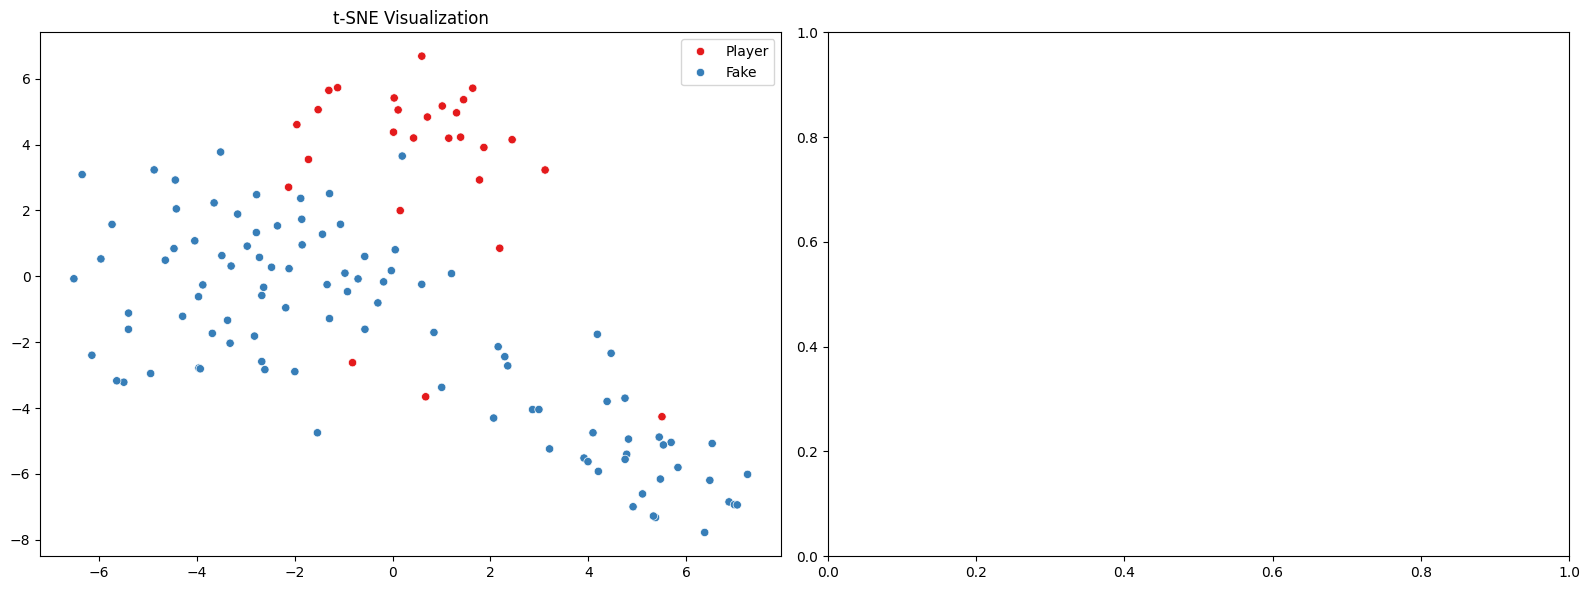

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
import umap

# Combine all vectors (players and fake)
all_vectors = np.vstack([player_post_layer, fake_post_layer])
labels = ["Player"] * len(player_post_layer) + ["Fake"] * len(fake_post_layer)

# Method 1: t-SNE visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_tsne = tsne.fit_transform(all_vectors)

# # Method 2: UMAP (often better preserves global structure)
# reducer = umap.UMAP(random_state=42)
# embeddings_umap = reducer.fit_transform(all_vectors)

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot t-SNE
sns.scatterplot(x=embeddings_tsne[:, 0], y=embeddings_tsne[:, 1], 
                hue=labels, ax=ax1, palette="Set1")
ax1.set_title("t-SNE Visualization")

# Plot UMAP
# sns.scatterplot(x=embeddings_umap[:, 0], y=embeddings_umap[:, 1], 
                # hue=labels, ax=ax2, palette="Set1")
# ax2.set_title("UMAP Visualization")

plt.tight_layout()

In [30]:
# Calculate within-group and between-group distances
player_player_distances = []
fake_fake_distances = []
player_fake_distances = []

for i in range(len(all_vectors)):
    for j in range(i+1, len(all_vectors)):
        dist = np.linalg.norm(all_vectors[i] - all_vectors[j])
        if i < len(player_post_layer) and j < len(player_post_layer):
            player_player_distances.append(dist)
        elif i >= len(player_post_layer) and j >= len(player_post_layer):
            fake_fake_distances.append(dist)
        else:
            player_fake_distances.append(dist)

# Plot distribution of distances
plt.figure(figsize=(10, 6))
sns.kdeplot(player_player_distances, label="Player-Player", fill=True)
sns.kdeplot(fake_fake_distances, label="Fake-Fake", fill=True)
sns.kdeplot(player_fake_distances, label="Player-Fake", fill=True)
plt.xlabel("Euclidean Distance")
plt.ylabel("Density")
plt.title("Distribution of Distances Between Vector Groups")
plt.legend()

NameError: name 'all_vectors' is not defined

Vector dimension: 1024
Vector dimension: 1024
Layer 0: 27 player vectors collected, 100 fake vectors collected.
Distances between player vectors and fake vectors:
Points in A: 27, in B: 100, total distances: 2700
Min: 3.7930, Mean: 18.7500, Median: 18.7812, Max: 23.3125
Distances to 0:
Points in A: 27, in B: 1, total distances: 27
Min: 13.5000, Mean: 15.3828, Median: 15.2188, Max: 18.3125
fakes to 0:
Points in A: 100, in B: 1, total distances: 100
Min: 12.5625, Mean: 15.7578, Median: 15.9219, Max: 19.3125
Vector dimension: 1024
Vector dimension: 1024
Layer 1: 27 player vectors collected, 100 fake vectors collected.
Distances between player vectors and fake vectors:
Points in A: 27, in B: 100, total distances: 2700
Min: 5.4766, Mean: 20.2656, Median: 20.2500, Max: 26.0625
Distances to 0:
Points in A: 27, in B: 1, total distances: 27
Min: 14.4922, Mean: 16.7344, Median: 16.7812, Max: 21.7656
fakes to 0:
Points in A: 100, in B: 1, total distances: 100
Min: 14.2031, Mean: 17.9375, Median: 

<Figure size 1200x600 with 0 Axes>

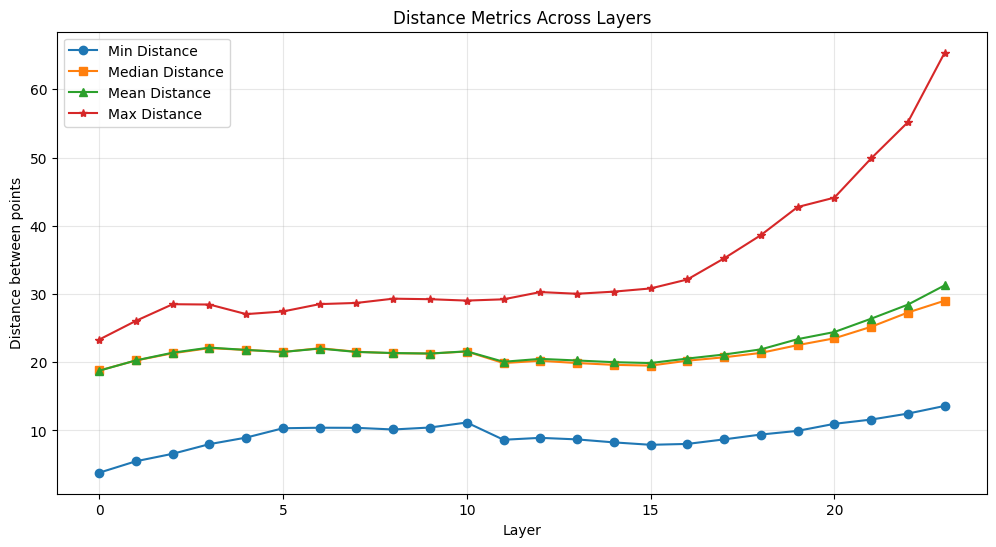

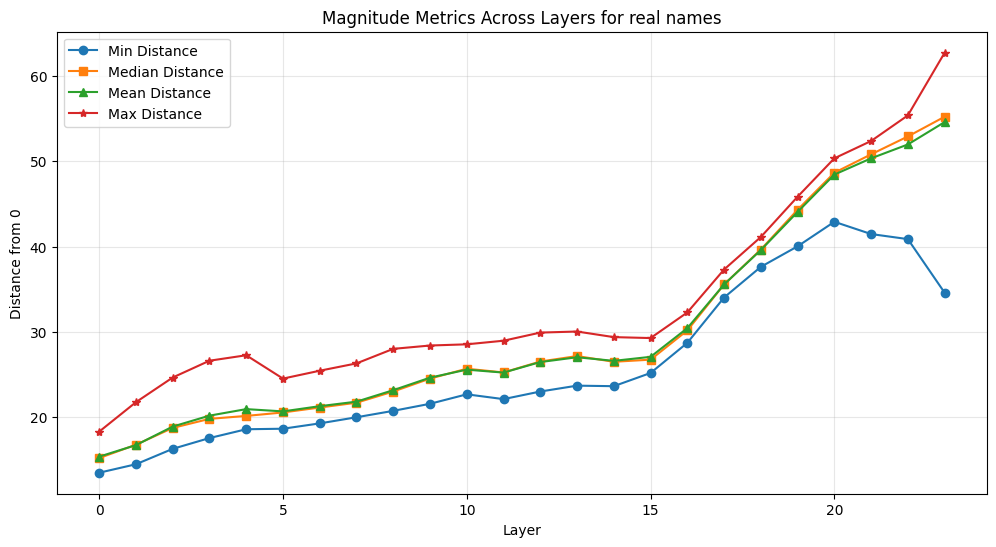

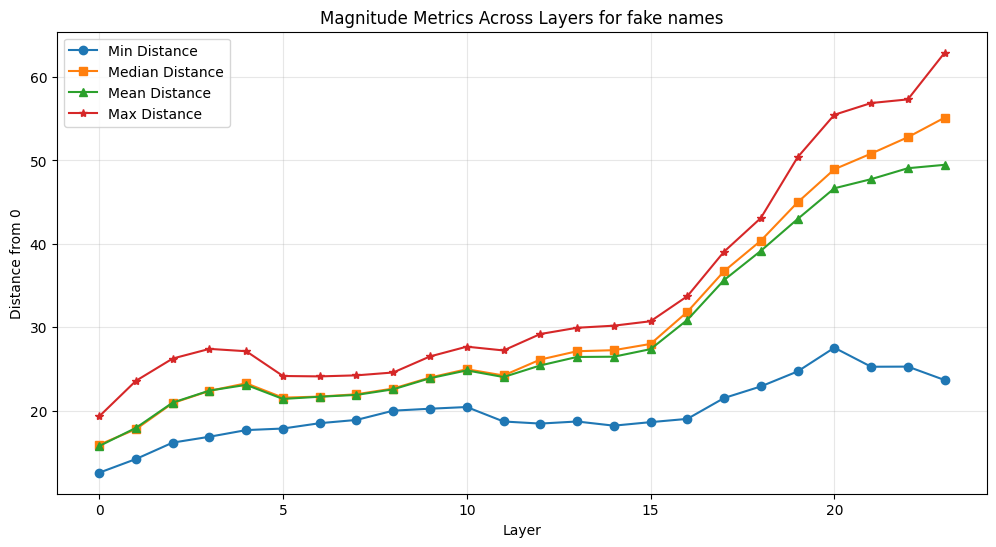

<Figure size 1200x600 with 0 Axes>

In [ ]:
from convex_point_cover.algorithms.kruskal import kruskal

num_layers = model.W_K.shape[0]

layers = range(num_layers)
stats = {'min': [], 'max': [], 'mean': [], 'median': []}
stats_player_to_0 = {'min': [], 'max': [], 'mean': [], 'median': []}
stats_fake_to_0 = {'min': [], 'max': [], 'mean': [], 'median': []}

cluster_sizes = [[], []]
for layer in range(0, num_layers, 1):
    player_post_layer = get_point_set(player_caches, f"blocks.{layer}.hook_resid_post", extra_vectors = 0, thickness = 0.2)
    fake_post_layer = get_point_set(fake_caches, f"blocks.{layer}.hook_resid_post", extra_vectors = 0, thickness = 0.2)
    print(
        f"Layer {layer}: {len(player_post_layer)} player vectors collected, {len(fake_post_layer)} fake vectors collected."
    )

    print("Distances between player vectors and fake vectors:")
    print_distance_stats(player_post_layer, fake_post_layer, stats_lists=stats)
    zero_vector = np.zeros_like(player_post_layer[0])
    print("Distances to 0:")
    print_distance_stats(
        player_post_layer,
        [zero_vector],
        stats_lists=stats_player_to_0,
    )
    print("fakes to 0:")
    print_distance_stats(
        fake_post_layer,
        [zero_vector],
        stats_lists=stats_fake_to_0,
    )

# Plot the evolution of distances across layers
plt.figure(figsize=(12, 6))
plt.plot(layers, stats['min'], marker="o", label="Min Distance")
plt.plot(layers, stats['median'], marker="s", label="Median Distance")
plt.plot(layers, stats['mean'], marker="^", label="Mean Distance")
plt.plot(layers, stats['max'], marker="*", label="Max Distance")
plt.xlabel("Layer")
plt.ylabel("Distance between points")
plt.title("Distance Metrics Across Layers")
plt.legend()
plt.grid(True, alpha=0.3)

plt.figure(figsize=(12, 6))

plt.plot(layers, stats_player_to_0["min"], marker="o", label="Min Distance")
plt.plot(layers, stats_player_to_0["median"], marker="s", label="Median Distance")
plt.plot(layers, stats_player_to_0["mean"], marker="^", label="Mean Distance")
plt.plot(layers, stats_player_to_0["max"], marker="*", label="Max Distance")
plt.xlabel("Layer")
plt.ylabel("Distance from 0")
plt.title("Magnitude Metrics Across Layers for real names")
plt.legend()
plt.grid(True, alpha=0.3)

plt.figure(figsize=(12, 6))

plt.plot(layers, stats_fake_to_0["min"], marker="o", label="Min Distance")
plt.plot(layers, stats_fake_to_0["median"], marker="s", label="Median Distance")
plt.plot(layers, stats_fake_to_0["mean"], marker="^", label="Mean Distance")
plt.plot(layers, stats_fake_to_0["max"], marker="*", label="Max Distance")
plt.xlabel("Layer")
plt.ylabel("Distance from 0")
plt.title("Magnitude Metrics Across Layers for fake names")
plt.legend()
plt.grid(True, alpha=0.3)

plt.figure(figsize=(12, 6))

In [ ]:
# Check how meaningfully different prefixed tokenizations are
name = "Michael Jordan"

for i in range(50):
    prefix = " " * i
    prompt = f"Fact: {prefix}{name}"

    tokens = model.to_tokens(prompt)
    print(f"Tokens for '{prompt}': {tokens}")
    

Tokens for 'Fact: Michael Jordan': tensor([[    0, 34182,    27,  6277, 13268]], device='cuda:0')
Tokens for 'Fact:  Michael Jordan': tensor([[    0, 34182,    27, 50276, 18744, 13268]], device='cuda:0')
Tokens for 'Fact:   Michael Jordan': tensor([[    0, 34182,    27, 50275, 18744, 13268]], device='cuda:0')
Tokens for 'Fact:    Michael Jordan': tensor([[    0, 34182,    27, 50274, 18744, 13268]], device='cuda:0')
Tokens for 'Fact:     Michael Jordan': tensor([[    0, 34182,    27, 50273, 18744, 13268]], device='cuda:0')
Tokens for 'Fact:      Michael Jordan': tensor([[    0, 34182,    27, 50272, 18744, 13268]], device='cuda:0')
Tokens for 'Fact:       Michael Jordan': tensor([[    0, 34182,    27, 50271, 18744, 13268]], device='cuda:0')
Tokens for 'Fact:        Michael Jordan': tensor([[    0, 34182,    27, 50270, 18744, 13268]], device='cuda:0')
Tokens for 'Fact:         Michael Jordan': tensor([[    0, 34182,    27, 50269, 18744, 13268]], device='cuda:0')
Tokens for 'Fact:         

In [14]:
# Check how meaningfully different prefixed embeddings are
name = "Michael Jordan"
prefixed_names = [" " * i + name for i in range(50)]
cache = compute_caches(prefixed_names)

Points in A: 50, in B: 50, total distances: 2450
Min: 0.2274, Mean: 0.8916, Median: 0.7749, Max: 2.4629
Points in A: 50, in B: 50, total distances: 2450
Min: 0.3042, Mean: 1.1621, Median: 1.0488, Max: 3.1328
Points in A: 50, in B: 50, total distances: 2450
Min: 0.3931, Mean: 1.5479, Median: 1.3818, Max: 4.0547
Points in A: 50, in B: 50, total distances: 2450
Min: 0.4622, Mean: 1.7949, Median: 1.5986, Max: 4.6992
Points in A: 50, in B: 50, total distances: 2450
Min: 0.6211, Mean: 2.4961, Median: 2.3477, Max: 6.2539
Points in A: 50, in B: 50, total distances: 2450
Min: 0.6660, Mean: 2.9922, Median: 2.8203, Max: 6.9961
Points in A: 50, in B: 50, total distances: 2450
Min: 0.6982, Mean: 3.6914, Median: 3.5703, Max: 8.7891
Points in A: 50, in B: 50, total distances: 2450
Min: 0.7793, Mean: 4.0547, Median: 3.9395, Max: 9.8359
Points in A: 50, in B: 50, total distances: 2450
Min: 0.7588, Mean: 4.5664, Median: 4.4453, Max: 10.9141
Points in A: 50, in B: 50, total distances: 2450
Min: 0.7461, M

<Figure size 1200x600 with 0 Axes>

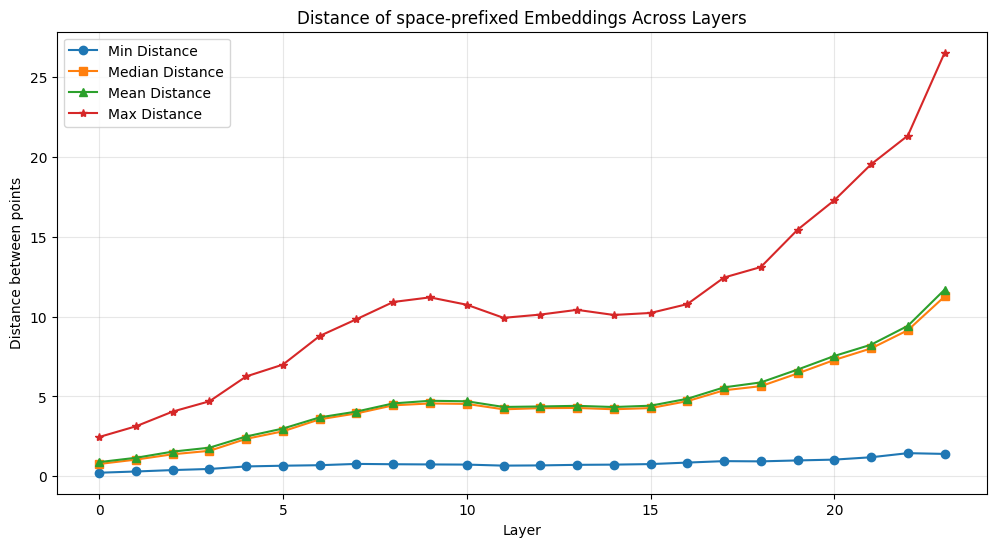

<Figure size 1200x600 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt

stats = {"min": [], "max": [], "mean": [], "median": []}

for layer in range(model.W_V.shape[0]):
    vectors = []
    for names in prefixed_names:
        vectors.append(cache[names][f"blocks.{layer}.hook_resid_post"].detach().cpu().numpy()[-1])
    print_distance_stats(vectors, vectors, stats_lists=stats, equal = True)

# Plot the evolution of distances across layers
plt.figure(figsize=(12, 6))
plt.plot(layers, stats["min"], marker="o", label="Min Distance")
plt.plot(layers, stats["median"], marker="s", label="Median Distance")
plt.plot(layers, stats["mean"], marker="^", label="Mean Distance")
plt.plot(layers, stats["max"], marker="*", label="Max Distance")
plt.xlabel("Layer")
plt.ylabel("Distance between points")
plt.title("Distance of space-prefixed Embeddings Across Layers")
plt.legend()
plt.grid(True, alpha=0.3)

plt.figure(figsize=(12, 6))

# Increase data size

Prompt: 'Fact: Bill Russell is known for playing the sport of' -> Completion: 'basketball.'
Prompt: 'Fact: Kevin Love is known for playing the sport of' -> Completion: 'basketball,'
Prompt: 'Fact: Ray Allen is known for playing the sport of' -> Completion: 'basketball,'
Prompt: 'Fact: Chris Paul is known for playing the sport of' -> Completion: 'basketball.'
Prompt: 'Fact: Michael Jordan is known for playing the sport of' -> Completion: 'basketball.'
Prompt: 'Fact: Tony Parker is known for playing the sport of' -> Completion: 'basketball,'
Prompt: 'Fact: Tim Duncan is known for playing the sport of' -> Completion: 'basketball,'
Prompt: 'Fact: Paul Pierce is known for playing the sport of' -> Completion: 'basketball,'
Prompt: 'Fact: Phil Jackson is known for playing the sport of' -> Completion: 'basketball.'
Prompt: 'Fact: Anthony Davis is known for playing the sport of' -> Completion: 'basketball,'
Prompt: 'Fact: Pat Riley is known for playing the sport of' -> Completion: 'basketball.'

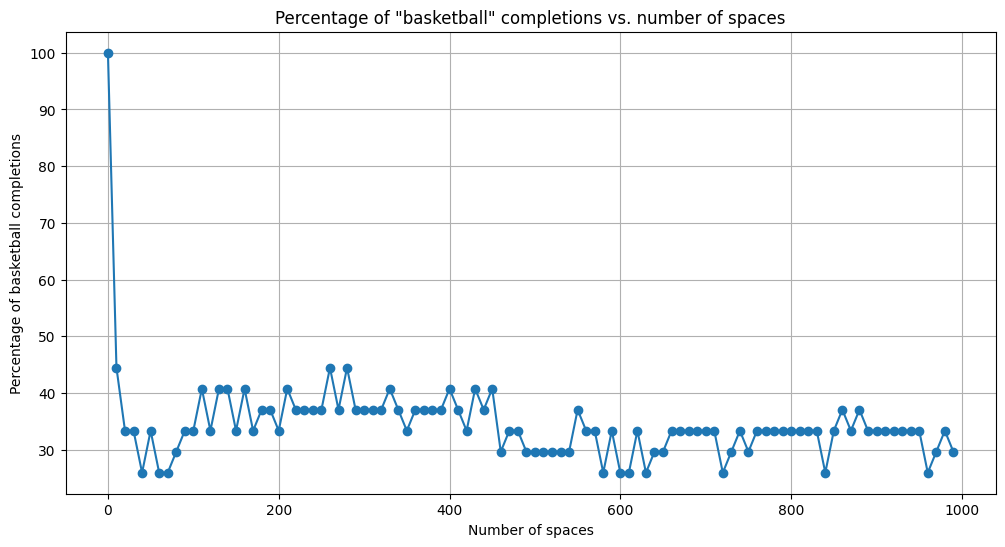

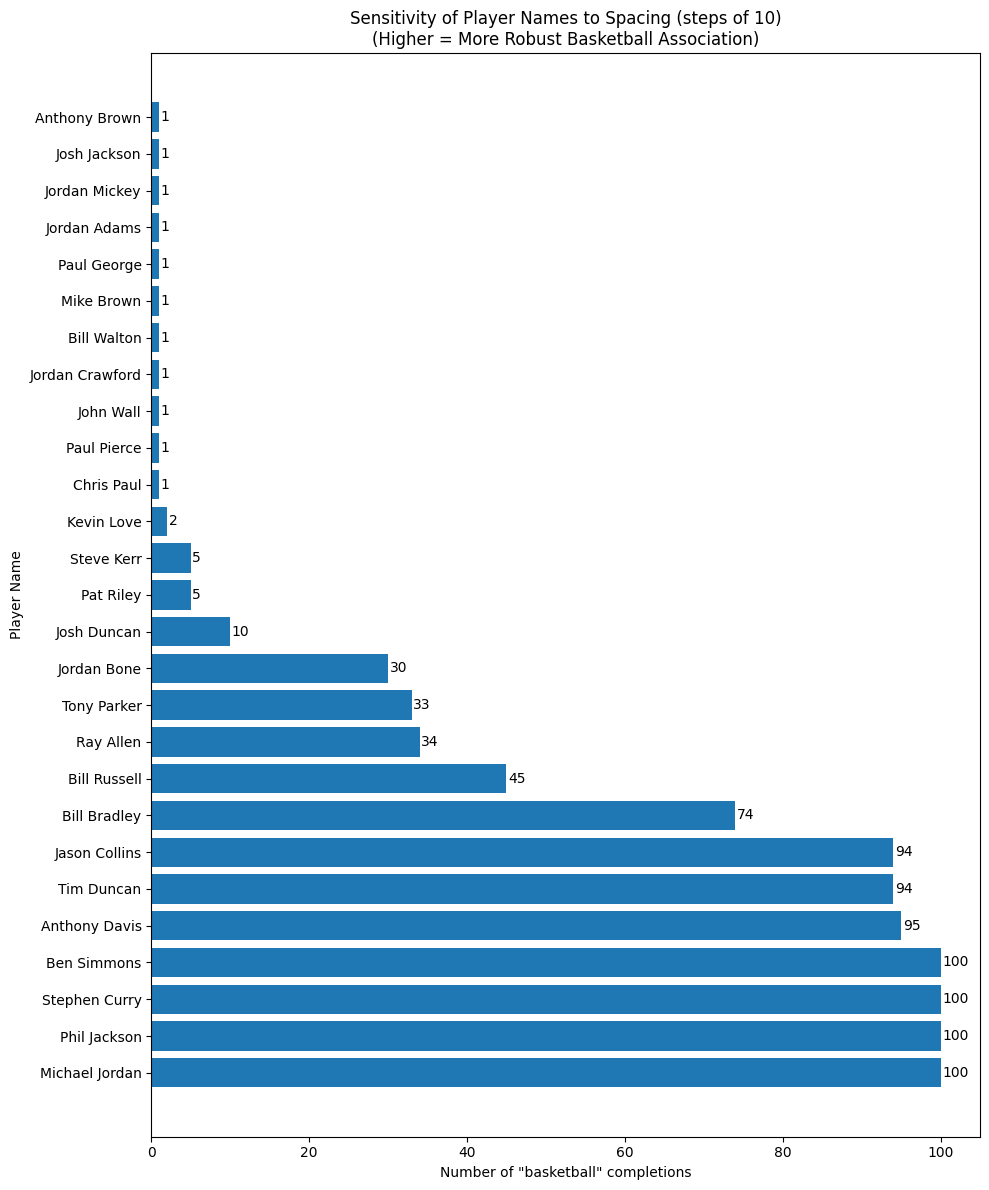

Average basketball completions per player: 34.52
Max basketball completions: 100
Min basketball completions: 1


In [38]:
# Create a list to store results
results_per_prefix = []
results_per_name = {name:0 for name in player_names}

# Loop through different numbers of spaces
for num_spaces in range(0, 1000, 10):
    prefix = " " * num_spaces
    basketball_count = 0
    total_count = 0
    
    # Test each player name
    for name in player_names:
        prompt = f"Fact: {prefix}{name} is known for playing the sport of"
        completion = model.generate(
            prompt, 
            max_new_tokens=2, 
            temperature=0,
            verbose=False
        )
        completion_text = completion[len(prompt):].strip()
        
        # Count basketball completions
        if completion_text.lower().startswith("basketball"):
            basketball_count += 1
            results_per_name[name] += 1
        total_count += 1
        
        # Print only a sample of the results to avoid flooding output
        if len(results_per_prefix) < 3 or num_spaces % 10 == 0:
            print(f"Prompt: '{prompt}' -> Completion: '{completion_text}'")
    
    # Store the results for this number of spaces
    percentage = (basketball_count / total_count) * 100 if total_count > 0 else 0
    results_per_prefix.append((num_spaces, basketball_count, total_count, percentage))
    print(f"Spaces: {num_spaces}, Basketball: {basketball_count}/{total_count} ({percentage:.2f}%)")

# Plot the results
import matplotlib.pyplot as plt

spaces = [r[0] for r in results_per_prefix]
percentages = [r[3] for r in results_per_prefix]

plt.figure(figsize=(12, 6))
plt.plot(spaces, percentages, marker='o')
plt.title('Percentage of "basketball" completions vs. number of spaces')
plt.xlabel('Number of spaces')
plt.ylabel('Percentage of basketball completions')
plt.grid(True)
plt.show()

# Sort players by their count of basketball completions
sorted_players = sorted(results_per_name.items(), key=lambda x: x[1], reverse=True)
player_names_sorted = [player[0] for player in sorted_players]
completion_counts = [player[1] for player in sorted_players]

# Create a horizontal bar chart for better readability with many player names
plt.figure(figsize=(10, 12))
bars = plt.barh(player_names_sorted, completion_counts)

# Add count labels to the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, 
             str(completion_counts[i]), 
             va='center')

plt.xlabel('Number of "basketball" completions')
plt.ylabel('Player Name')
plt.title('Sensitivity of Player Names to Spacing (steps of 10)\n(Higher = More Robust Basketball Association)')
plt.tight_layout()
plt.show()

# Summary statistics
print(f"Average basketball completions per player: {sum(completion_counts)/len(completion_counts):.2f}")
print(f"Max basketball completions: {max(completion_counts)}")
print(f"Min basketball completions: {min(completion_counts)}")

TODO:
* Try using faster_kruskal, check if it is indeed faster for 1000 dimensions. Also try the alternative pivot choosing.

In [51]:
from convex_point_cover.algorithms.fast_kruskal import fast_kruskal

from joblib import Parallel, delayed

num_layers = model.W_K.shape[0]
layers = range(num_layers)

def process_layer(layer, player_vectors, fake_vectors):
    positive_clusters = fast_kruskal(
        player_vectors,
        fake_vectors,
        epsilon=0.1,
        debug=False,
    )
    negative_clusters = fast_kruskal(
        fake_vectors,
        player_vectors,
        epsilon=0.1,
        debug=False,
    )
    return {
        "layer": layer,
        "player_count": len(player_vectors),
        "fake_count": len(fake_vectors),
        "positive_clusters": len(positive_clusters),
        "negative_clusters": len(negative_clusters),
    }


# Run parallel computation - will use all available cores
print("Processing layers in parallel...")
results = Parallel(n_jobs=-1, verbose=10)(
    delayed(process_layer)(
        layer,
        get_point_set(
            player_caches,
            f"blocks.{layer}.hook_resid_post",
            extra_vectors=0,
            thickness=0.2,
        ),
        get_point_set(
            fake_caches,
            f"blocks.{layer}.hook_resid_post",
            extra_vectors=0,
            thickness=0.2,
        ),
    )
    for layer in layers
)

# Process and display results
cluster_sizes = [[], []]
for result in sorted(results, key=lambda x: x["layer"]):
    layer = result["layer"]
    player_count = result["player_count"]
    fake_count = result["fake_count"]
    pos_clusters = result["positive_clusters"]
    neg_clusters = result["negative_clusters"]

    # Store results
    cluster_sizes[0].append(pos_clusters)
    cluster_sizes[1].append(neg_clusters)

    # Print layer info
    print(
        f"Layer {layer}: {player_count} player vectors collected, {fake_count} fake vectors collected."
    )
    print(f"{pos_clusters} clusters found.")
    print(f"{neg_clusters} negative clusters found.")

# Plot the number of clusters found across layers
plt.figure(figsize=(12, 6))
plt.plot(layers, cluster_sizes[0], marker="o", label="Positive Clusters")
plt.plot(layers, cluster_sizes[1], marker="s", label="Negative Clusters")
plt.xlabel("Layer")
plt.ylabel("Number of Clusters")
plt.title("Number of Clusters Found Across Layers")
plt.legend()
plt.grid(True, alpha=0.3)

Processing layers in parallel...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Vector dimension: 1024
Vector dimension: 1024


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   19.0s


Vector dimension: 1024
Vector dimension: 1024


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.